In [92]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer, load_iris
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [93]:
def print_metrics(y_true, y_pred):
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred, average='weighted')
    recall = recall_score(y_true, y_pred, average='weighted')
    f1 = f1_score(y_true, y_pred, average='weighted')
    
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")

In [94]:
breast_cancer = load_breast_cancer()

**Breast Cancer Dataset**

In [95]:
x_bc = breast_cancer.data
y_bc = breast_cancer.target
x_train_bc, x_test_bc, y_train_bc, y_test_bc = train_test_split(x_bc, y_bc, test_size=0.2, random_state=14)

In [96]:
#PCA
pca_bc = PCA(n_components=2)
x_train_pca_bc = pca_bc.fit_transform(x_train_bc)
x_test_pca_bc = pca_bc.transform(x_test_bc)

In [97]:
#LDA
lda_bc = LinearDiscriminantAnalysis(n_components=min(x_train_bc.shape[1], len(np.unique(y_bc)) - 1))
x_train_lda_bc = lda_bc.fit_transform(x_train_bc, y_train_bc)
x_test_lda_bc = lda_bc.transform(x_test_bc)

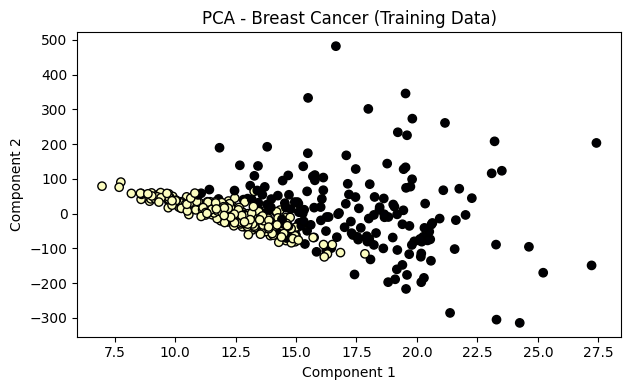

In [98]:
#plot PCA for training data
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(x_train_bc[:,0], x_train_pca_bc[:,1], c=y_train_bc, cmap='magma', edgecolor='k')
plt.title("PCA - Breast Cancer (Training Data)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.tight_layout()
plt.show()

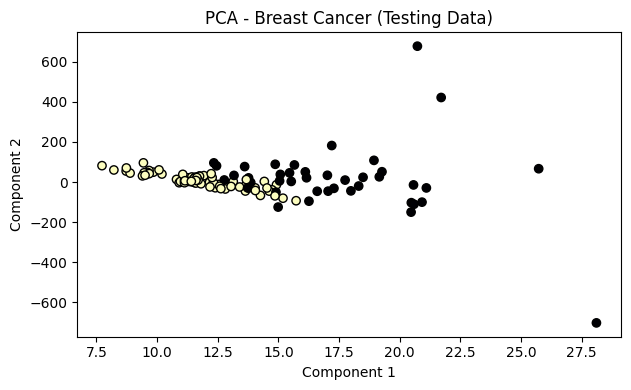

In [99]:
#plot PCA for testing data
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.scatter(x_test_bc[:,0], x_test_pca_bc[:,1], c=y_test_bc, cmap='magma', edgecolors='k')
plt.title("PCA - Breast Cancer (Testing Data)")
plt.xlabel("Component 1")
plt.ylabel("Component 2")
plt.tight_layout()
plt.show()

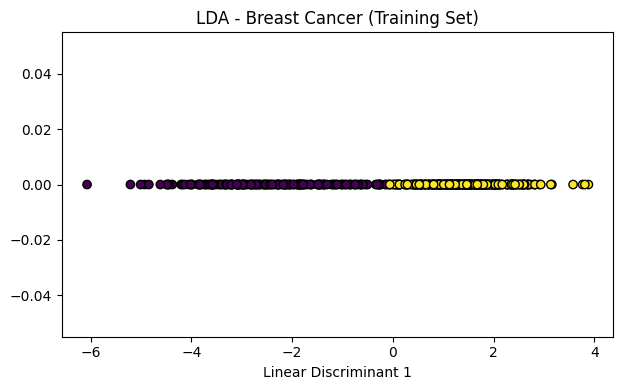

In [100]:
#plot LDA for training data
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(x_train_lda_bc, np.zeros_like(x_train_lda_bc), c=y_train_bc, cmap='viridis', edgecolor='k')
plt.title('LDA - Breast Cancer (Training Set)')
plt.xlabel('Linear Discriminant 1')
plt.tight_layout()
plt.show()

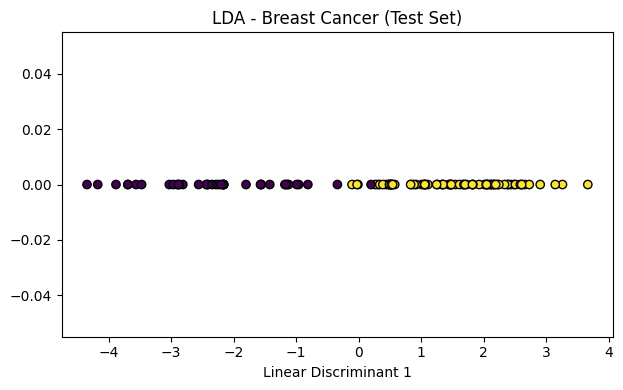

In [101]:
#plot LDA for testing data
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.scatter(x_test_lda_bc, np.zeros_like(x_test_lda_bc), c=y_test_bc, cmap='viridis', edgecolor='k')
plt.title('LDA - Breast Cancer (Test Set)')
plt.xlabel('Linear Discriminant 1')
plt.tight_layout()
plt.show()

In [102]:
# Print PCA Variance
print("Variance of PCA coefficients (Breast Cancer):")
print(pca_bc.explained_variance_ratio_)

Variance of PCA coefficients (Breast Cancer):
[0.98501309 0.0136516 ]


In [103]:
# Train and Evaluate Classifiers for Breast Cancer
# KNN
knn_bc = KNeighborsClassifier(n_neighbors=3)
knn_bc.fit(x_train_bc, y_train_bc)
y_pred_knn_bc = knn_bc.predict(x_test_bc)

print("\nResults for Breast Cancer - KNN:")
print_metrics(y_test_bc, y_pred_knn_bc)


Results for Breast Cancer - KNN:
Accuracy: 0.9474
Precision: 0.9487
Recall: 0.9474
F1 Score: 0.9467


In [104]:
# Decision Tree
dt_bc = DecisionTreeClassifier(random_state=14)
dt_bc.fit(x_train_bc, y_train_bc)
y_pred_dt_bc = dt_bc.predict(x_test_bc)

print("\nResults for Breast Cancer - Decision Tree:")
print_metrics(y_test_bc, y_pred_dt_bc)


Results for Breast Cancer - Decision Tree:
Accuracy: 0.9561
Precision: 0.9561
Recall: 0.9561
F1 Score: 0.9560


In [105]:
# Random Forest
rf_bc = RandomForestClassifier(random_state=14)
rf_bc.fit(x_train_bc, y_train_bc)
y_pred_rf_bc = rf_bc.predict(x_test_bc)

print("\nResults for Breast Cancer - Random Forest:")
print_metrics(y_test_bc, y_pred_rf_bc)


Results for Breast Cancer - Random Forest:
Accuracy: 0.9649
Precision: 0.9652
Recall: 0.9649
F1 Score: 0.9647


**IRIS DATASET**

In [106]:
iris = load_iris()

In [107]:
x_iris = iris.data
y_iris = iris.target
x_train_iris, x_test_iris, y_train_iris, y_test_iris = train_test_split(x_iris, y_iris, test_size=0.44, random_state=42)

In [108]:
# PCA
pca_iris = PCA(n_components=2)
x_train_pca_iris = pca_iris.fit_transform(x_train_iris)
x_test_pca_iris = pca_iris.transform(x_test_iris)

In [109]:
# LDA
lda_iris = LinearDiscriminantAnalysis(n_components=2)
x_train_lda_iris = lda_iris.fit_transform(x_train_iris, y_train_iris)
x_test_lda_iris = lda_iris.transform(x_test_iris)

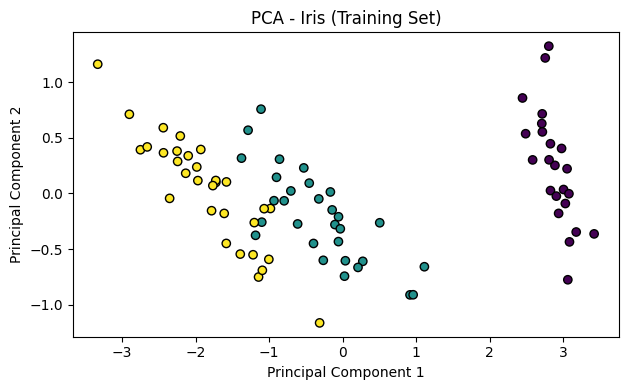

In [110]:
# Plot PCA for training
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(x_train_pca_iris[:, 0], x_train_pca_iris[:, 1], c=y_train_iris, cmap='viridis', edgecolor='k')
plt.title('PCA - Iris (Training Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

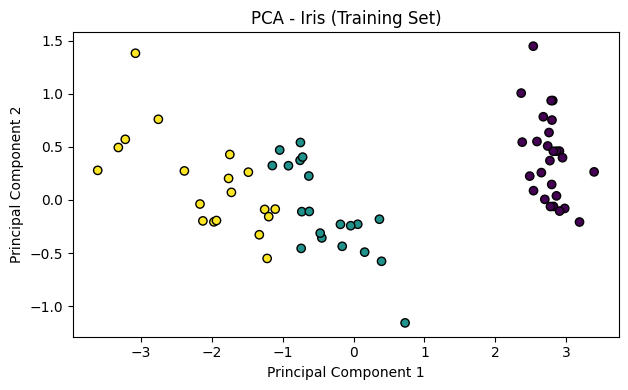

In [111]:
# Plot PCA for testing
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(x_test_pca_iris[:, 0], x_test_pca_iris[:, 1], c=y_test_iris, cmap='viridis', edgecolor='k')
plt.title('PCA - Iris (Training Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

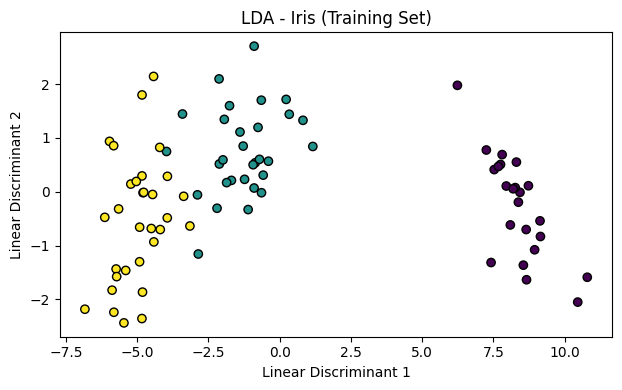

In [112]:
# Plot LDA for training
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(x_train_lda_iris[:, 0], x_train_lda_iris[:, 1], c=y_train_iris, cmap='viridis', edgecolor='k')
plt.title('LDA - Iris (Training Set)')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.tight_layout()
plt.show()


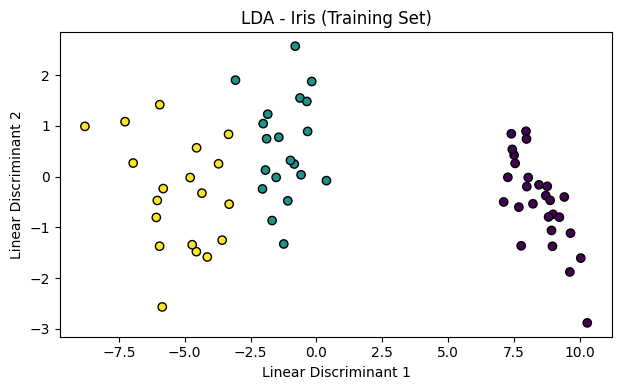

In [113]:
# Plot LDA for testing
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(x_test_lda_iris[:, 0], x_test_lda_iris[:, 1], c=y_test_iris, cmap='viridis', edgecolor='k')
plt.title('LDA - Iris (Training Set)')
plt.xlabel('Linear Discriminant 1')
plt.ylabel('Linear Discriminant 2')
plt.tight_layout()
plt.show()

In [114]:
# Print PCA Variance
print("\nVariance of PCA coefficients (Iris):")
print(pca_iris.explained_variance_ratio_)


Variance of PCA coefficients (Iris):
[0.91425626 0.05853638]


In [115]:
# Train and Evaluate Classifiers for Iris
# KNN
knn_iris = KNeighborsClassifier(n_neighbors=3)
knn_iris.fit(x_train_iris, y_train_iris)
y_pred_knn_iris = knn_iris.predict(x_test_iris)

print("\nResults for Iris - KNN:")
print_metrics(y_test_iris, y_pred_knn_iris)


Results for Iris - KNN:
Accuracy: 0.9697
Precision: 0.9725
Recall: 0.9697
F1 Score: 0.9696


In [117]:
# Random Forest
rf_iris = RandomForestClassifier(random_state=14)
rf_iris.fit(x_train_iris, y_train_iris)
y_pred_rf_iris = rf_iris.predict(x_test_iris)

print("\nResults for Iris - Random Forest:")
print_metrics(y_test_iris, y_pred_rf_iris)


Results for Iris - Random Forest:
Accuracy: 0.9848
Precision: 0.9856
Recall: 0.9848
F1 Score: 0.9848


In [ ]:
# Decision Tree
dt_iris = DecisionTreeClassifier(random_state=14)
dt_iris.fit(x_train_iris, y_train_iris)
y_pred_dt_iris = dt_iris.predict(x_test_iris)

print("\nResults for Iris - Decision Tree:")
print_metrics(y_test_iris, y_pred_dt_iris)


Results for Iris - Decision Tree:
Accuracy: 0.9848
Precision: 0.9856
Recall: 0.9848
F1 Score: 0.9848


In [ ]:
# Decision Tree
dt_iris = DecisionTreeClassifier(random_state=14)
dt_iris.fit(x_train_iris, y_train_iris)
y_pred_dt_iris = dt_iris.predict(x_test_iris)

print("\nResults for Iris - Decision Tree:")
print_metrics(y_test_iris, y_pred_dt_iris)


Results for Iris - Decision Tree:
Accuracy: 0.9848
Precision: 0.9856
Recall: 0.9848
F1 Score: 0.9848


In [ ]:
# Decision Tree
dt_iris = DecisionTreeClassifier(random_state=14)
dt_iris.fit(x_train_iris, y_train_iris)
y_pred_dt_iris = dt_iris.predict(x_test_iris)

print("\nResults for Iris - Decision Tree:")
print_metrics(y_test_iris, y_pred_dt_iris)


Results for Iris - Decision Tree:
Accuracy: 0.9848
Precision: 0.9856
Recall: 0.9848
F1 Score: 0.9848


In [ ]:
# Decision Tree
dt_iris = DecisionTreeClassifier(random_state=14)
dt_iris.fit(x_train_iris, y_train_iris)
y_pred_dt_iris = dt_iris.predict(x_test_iris)

print("\nResults for Iris - Decision Tree:")
print_metrics(y_test_iris, y_pred_dt_iris)


Results for Iris - Decision Tree:
Accuracy: 0.9848
Precision: 0.9856
Recall: 0.9848
F1 Score: 0.9848


In [ ]:
# Decision Tree
dt_iris = DecisionTreeClassifier(random_state=14)
dt_iris.fit(x_train_iris, y_train_iris)
y_pred_dt_iris = dt_iris.predict(x_test_iris)

print("\nResults for Iris - Decision Tree:")
print_metrics(y_test_iris, y_pred_dt_iris)


Results for Iris - Decision Tree:
Accuracy: 0.9848
Precision: 0.9856
Recall: 0.9848
F1 Score: 0.9848


In [ ]:
# Decision Tree
dt_iris = DecisionTreeClassifier(random_state=14)
dt_iris.fit(x_train_iris, y_train_iris)
y_pred_dt_iris = dt_iris.predict(x_test_iris)

print("\nResults for Iris - Decision Tree:")
print_metrics(y_test_iris, y_pred_dt_iris)


Results for Iris - Decision Tree:
Accuracy: 0.9848
Precision: 0.9856
Recall: 0.9848
F1 Score: 0.9848


In [ ]:
# Decision Tree
dt_iris = DecisionTreeClassifier(random_state=14)
dt_iris.fit(x_train_iris, y_train_iris)
y_pred_dt_iris = dt_iris.predict(x_test_iris)

print("\nResults for Iris - Decision Tree:")
print_metrics(y_test_iris, y_pred_dt_iris)


Results for Iris - Decision Tree:
Accuracy: 0.9848
Precision: 0.9856
Recall: 0.9848
F1 Score: 0.9848


In [ ]:
# Decision Tree
dt_iris = DecisionTreeClassifier(random_state=14)
dt_iris.fit(x_train_iris, y_train_iris)
y_pred_dt_iris = dt_iris.predict(x_test_iris)

print("\nResults for Iris - Decision Tree:")
print_metrics(y_test_iris, y_pred_dt_iris)


Results for Iris - Decision Tree:
Accuracy: 0.9848
Precision: 0.9856
Recall: 0.9848
F1 Score: 0.9848


In [ ]:
# Decision Tree
dt_iris = DecisionTreeClassifier(random_state=14)
dt_iris.fit(x_train_iris, y_train_iris)
y_pred_dt_iris = dt_iris.predict(x_test_iris)

print("\nResults for Iris - Decision Tree:")
print_metrics(y_test_iris, y_pred_dt_iris)


Results for Iris - Decision Tree:
Accuracy: 0.9848
Precision: 0.9856
Recall: 0.9848
F1 Score: 0.9848


In [ ]:
# Decision Tree
dt_iris = DecisionTreeClassifier(random_state=14)
dt_iris.fit(x_train_iris, y_train_iris)
y_pred_dt_iris = dt_iris.predict(x_test_iris)

print("\nResults for Iris - Decision Tree:")
print_metrics(y_test_iris, y_pred_dt_iris)


Results for Iris - Decision Tree:
Accuracy: 0.9848
Precision: 0.9856
Recall: 0.9848
F1 Score: 0.9848


In [ ]:
# Decision Tree
dt_iris = DecisionTreeClassifier(random_state=14)
dt_iris.fit(x_train_iris, y_train_iris)
y_pred_dt_iris = dt_iris.predict(x_test_iris)

print("\nResults for Iris - Decision Tree:")
print_metrics(y_test_iris, y_pred_dt_iris)


Results for Iris - Decision Tree:
Accuracy: 0.9848
Precision: 0.9856
Recall: 0.9848
F1 Score: 0.9848


In [118]:
diabetes = pd.read_csv("C:\Abhinav\Test\Datasets\AML\diabetes.csv")

<>:1: SyntaxWarning: invalid escape sequence '\A'
<>:1: SyntaxWarning: invalid escape sequence '\A'
C:\Users\abhin\AppData\Local\Temp\ipykernel_1420\309430075.py:1: SyntaxWarning: invalid escape sequence '\A'
  diabetes = pd.read_csv("C:\Abhinav\Test\Datasets\AML\diabetes.csv")


In [119]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [120]:
x_diabetes = diabetes.drop(['Outcome'], axis=1)
y_diabetes = diabetes['Outcome']

In [121]:
x_train_diabetes, x_test_diabetes, y_train_diabetes, y_test_diabetes = train_test_split(x_diabetes, y_diabetes, test_size=0.2, random_state=42)

In [122]:
# PCA for Diabetes
pca_diabetes = PCA(n_components=2)
x_train_pca_diabetes = pca_diabetes.fit_transform(x_train_diabetes)
x_test_pca_diabetes = pca_diabetes.transform(x_test_diabetes)

In [123]:
# LDA for Diabetes
lda_diabetes = LinearDiscriminantAnalysis(n_components=min(x_train_bc.shape[1], len(np.unique(y_bc)) - 1))
x_train_lda_diabetes = lda_diabetes.fit_transform(x_train_diabetes, y_train_diabetes)
x_test_lda_diabetes = lda_diabetes.transform(x_test_diabetes)


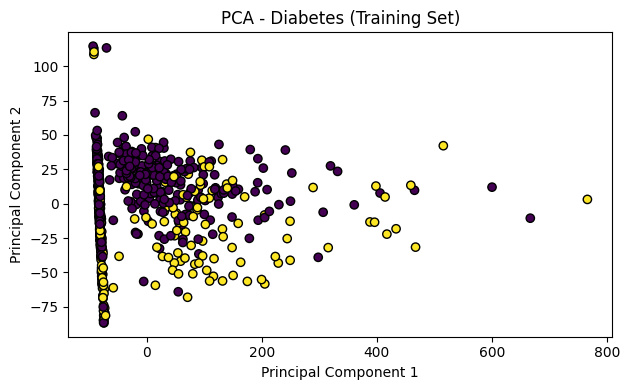

In [124]:
# Plot PCA for training
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(x_train_pca_diabetes[:, 0], x_train_pca_diabetes[:, 1], c=y_train_diabetes, cmap='viridis', edgecolor='k')
plt.title('PCA - Diabetes (Training Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

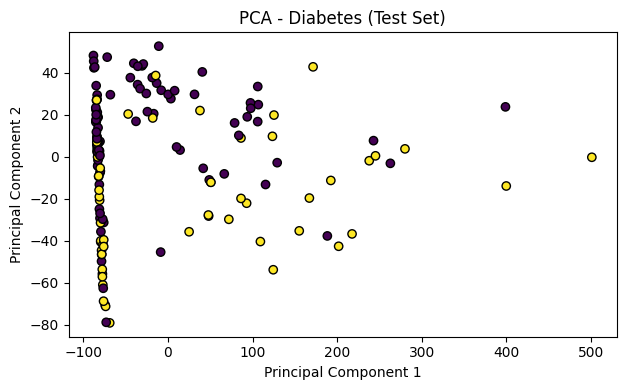

In [125]:
# Plot PCA for testing
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 2)
plt.scatter(x_test_pca_diabetes[:, 0], x_test_pca_diabetes[:, 1], c=y_test_diabetes, cmap='viridis', edgecolor='k')
plt.title('PCA - Diabetes (Test Set)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

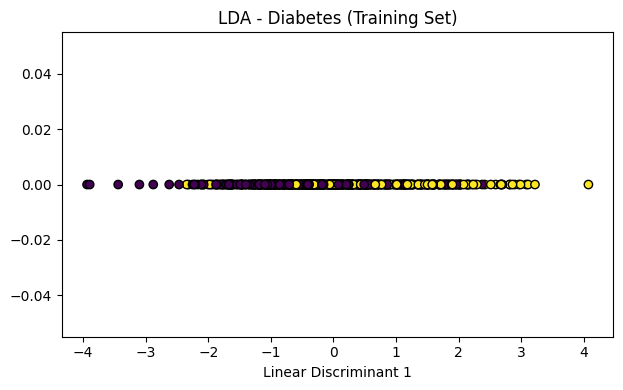

In [126]:
# Plot LDA for Training
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(x_train_lda_diabetes, np.zeros_like(x_train_lda_diabetes), c=y_train_diabetes, cmap='viridis', edgecolor='k')
plt.title('LDA - Diabetes (Training Set)')
plt.xlabel('Linear Discriminant 1')
plt.tight_layout()
plt.show()


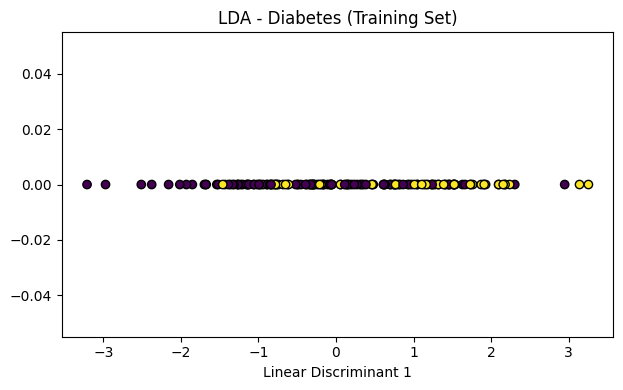

In [127]:
# Plot LDA for Testing
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(x_test_lda_diabetes, np.zeros_like(x_test_lda_diabetes), c=y_test_diabetes, cmap='viridis', edgecolor='k')
plt.title('LDA - Diabetes (Training Set)')
plt.xlabel('Linear Discriminant 1')
plt.tight_layout()
plt.show()

In [128]:
# Print PCA Variance
print("\nVariance of PCA coefficients (Diabetes):")
print(pca_diabetes.explained_variance_ratio_)


Variance of PCA coefficients (Diabetes):
[0.89331491 0.06098852]


In [129]:
# Train and Evaluate Classifiers for Diabetes
# KNN
knn_diabetes = KNeighborsClassifier(n_neighbors=3)
knn_diabetes.fit(x_train_diabetes, y_train_diabetes)
y_pred_knn_diabetes = knn_diabetes.predict(x_test_diabetes)

print("\nResults for Diabetes - KNN:")
print_metrics(y_test_diabetes, y_pred_knn_diabetes)


Results for Diabetes - KNN:
Accuracy: 0.6494
Precision: 0.6728
Recall: 0.6494
F1 Score: 0.6558


In [130]:
# Decision Tree
dt_diabetes = DecisionTreeClassifier(random_state=14)
dt_diabetes.fit(x_train_diabetes, y_train_diabetes)
y_pred_dt_diabetes = dt_diabetes.predict(x_test_diabetes)

print("\nResults for Diabetes - Decision Tree:")
print_metrics(y_test_diabetes, y_pred_dt_diabetes)


Results for Diabetes - Decision Tree:
Accuracy: 0.7468
Precision: 0.7589
Recall: 0.7468
F1 Score: 0.7503


In [131]:
# Random Forest
rf_diabetes = RandomForestClassifier(random_state=14)
rf_diabetes.fit(x_train_diabetes, y_train_diabetes)
y_pred_rf_diabetes = rf_diabetes.predict(x_test_diabetes)

print("\nResults for Diabetes - Random Forest:")
print_metrics(y_test_diabetes, y_pred_rf_diabetes)


Results for Diabetes - Random Forest:
Accuracy: 0.7532
Precision: 0.7532
Recall: 0.7532
F1 Score: 0.7532
